In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [15]:
from pathlib import Path

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

In [26]:
def load_raw_data(file):
    filePath = Path('C:\\Temp\\MRes\\training_data', file)
    data = pd.read_csv(filePath)
    return data

def feature_target(data):
    data = data.drop(columns=['geometry'])
    X, y = data.iloc[:,1:], data['GENUS']
    return(X, y)

def train_SVM(X_train, y_train):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def train_RF(X_train, y_train):
    model = RandomForestClassifier(n_estimators = 100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def train_AB(X_train, y_train):
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def print_metrics(y_test, y_pred, X_test, model, file):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('F1:', metrics.f1_score(y_test, y_pred, average='weighted'))
    print('Precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', metrics.precision_score(y_test, y_pred, average='weighted'))

    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax=ax)
    filePath = Path('C:\\Temp\\MRes\\Figures', file)
    plt.savefig(filePath)
    plt.show()
    
def feature_importance_rank(model, model_name):
    fig, ax = plt.subplots(figsize=(10, 7))
    skplt.estimators.plot_feature_importances(model, feature_names = col_heads, title=model_name, max_num_features = 10, ax=ax)

In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [20]:
# Load the dataset
data = load_raw_data('AB_6cat_slim.csv')

# Split the data into features (X) and target (y)
X, y = feature_target(data)
col_heads = list(X.columns.values.tolist())

# Split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Accuracy: 0.4659090909090909
F1: 0.3231244167625165
Precision: 0.25224905303030304
Recall: 0.25224905303030304


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


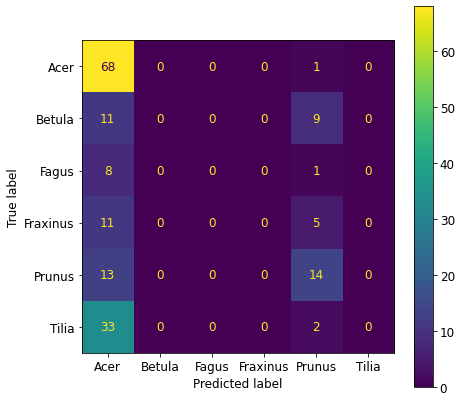

In [12]:
# Support Vector Machines

model, y_pred = train_SVM(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model, '6cat_unbalanced_SVM.eps')

Accuracy: 0.5568181818181818
F1: 0.5238265578377781
Precision: 0.5293442801217921
Recall: 0.5293442801217921


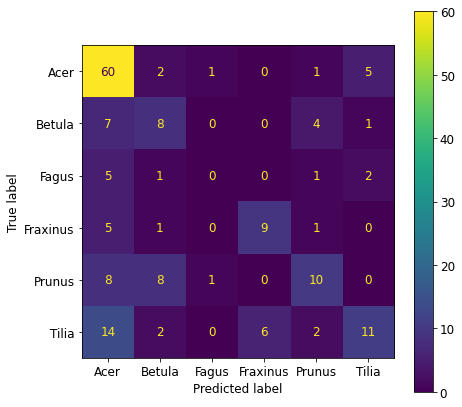

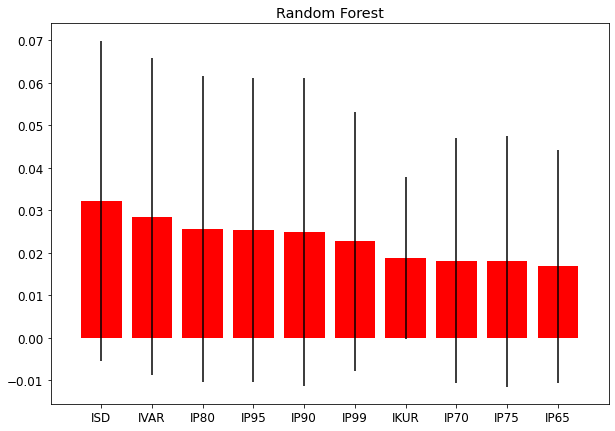

In [27]:
# Random Forest

model, y_pred = train_RF(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model, '6cat_unbalanced_RF.eps')

feature_importance_rank(model, 'Random Forest')

Accuracy: 0.5227272727272727
F1: 0.5057344989572026
Precision: 0.501659159081743
Recall: 0.501659159081743


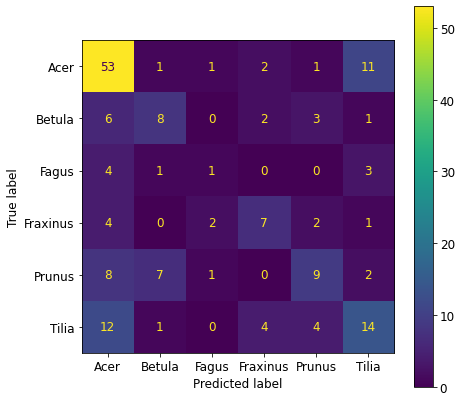

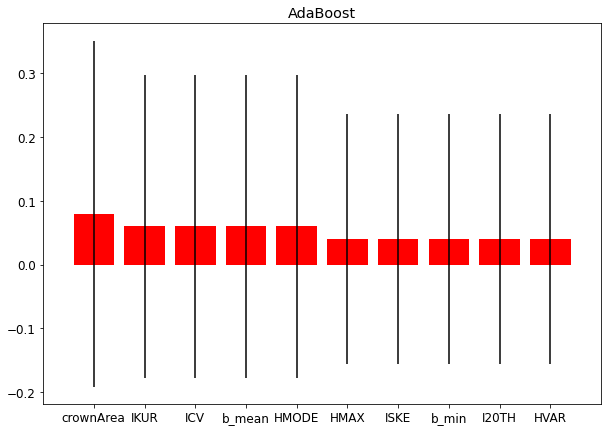

In [28]:
# AdaBoost

model, y_pred = train_AB(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model, '6cat_unbalanced_AB.eps')

feature_importance_rank(model, 'AdaBoost')